# Lab 3 Modelación y Simulación

## Parte 2 Numeros Aleatorios

### Tasks 1
Considere un experimento en el cual se cuentan cuántos carros pasan por una calle determinada dentro de un
rango de tiempo dado. Sabemos que el tiempo de espera para el n-ésimo evento puede ser modelando a través de
una variable gamma. Considere el caso en el que usted está esperando que pase el 3er carro en la calle dada.
1. Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos.

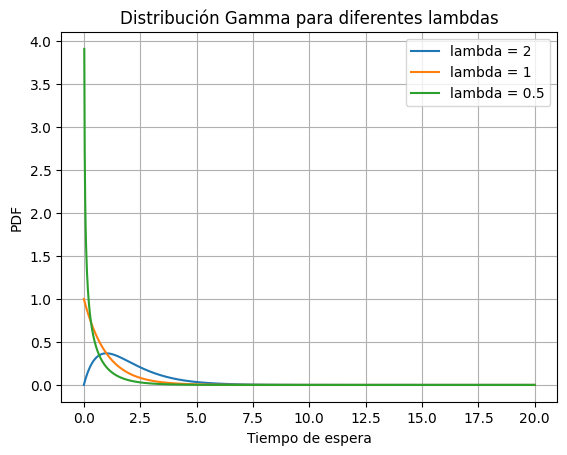

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

lambdas = [2, 1, 0.5]

x = np.linspace(0, 20, 1000)

for lam in lambdas:
    y = gamma.pdf(x, lam)
    
    plt.plot(x, y, label=f'lambda = {lam}')

plt.xlabel('Tiempo de espera')
plt.ylabel('PDF')
plt.title('Distribución Gamma para diferentes lambdas')
plt.legend()
plt.grid(True)
plt.show()


¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el
número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de
ocurrencias de un evento?

- Esta gráfica lo que nos indica es la probabilidad de que un carro pase por una calle luego de cierto tiempo (en este caso 0.5, 1 y 2). 
Como se puede observar para un tiempo de espera de 0.5, la probabilidad de que de que ocurra el evento disminuye a medida que aumenta el tiempo de espera.
Para un tiempo de espera de 1, ocurre lo mismo que con un lambda de 0.5 siendo esta que la probabilidad de que de que ocurra el evento disminuye a medida que aumenta el tiempo de espera. Pero pero la tasa de disminución es menor.
Por último para un lambda de 2, la probabilidad de que ocurra el evento tiene una pequeña tendencia a aumentar inicialmente después de esperar un corto período de tiempo antes de disminuir gradualmente.


- La relación que existe entre el tiempo de espera y el numero de ocurrencias de un evento se centra en que cuanto mayor sea el valor de lambda, es decir la probabilidad de que ocurra el evento. Más probable será que el evento ocurra pronto después de esperar un corto período de tiempo, y viceversa.

## Task 2

In [14]:
import random

def generador1(size, semilla):
    x = semilla
    lista = []

    for _ in range(size):
        x = (5**5 * x) % (2**35 - 1)
        lista.append(x / (2**35 - 1))

    return lista
    
def generador2(size, semilla):
    x = semilla
    lista = []
    
    for _ in range(size):
        x = (7**5 * x) % (2**31 - 1)
        lista.append(x / (2**31 - 1))

    return lista

def generador3(size):
    return [random.random() for i in range(size)]

def histograma(data, label):
    histograma = [0] * 10
    for value in data:
        index = int(value * 10)
        histograma[index] += 1

    max_asteriscos = 20
    max_count = max(histograma)
    scale_factor = max_count / max_asteriscos

    print(f"{label}")
    for i in range(10):
        range_str = f"{i/10:.1f}-{(i+1)/10:.1f}:"
        asterisks = "*" * int(histograma[i] / scale_factor)
        percentage = f"({histograma[i]}, {histograma[i] / len(data) * 100:.2f}%)"
        print(f"{range_str.ljust(6)} {asterisks.ljust(40)} {percentage}")
    print()

repeticiones = [100, 5000, 100000]

for n in repeticiones:
    data_list = []
    generador = 0

    data_1 = generador1(n, 123)
    data_2 = generador2(n, 123)
    data_3 = generador3(n)

    histograma(data_1, f"Generador 1 con {n} repeticiones")
    histograma(data_2, f"Generador 2 con {n} repeticiones")
    histograma(data_3, f"Generador 3 con {n} repeticiones")

Generador 1 con 100 repeticiones
0.0-0.1: ****************                         (11, 11.00%)
0.1-0.2: ************                             (8, 8.00%)
0.2-0.3: ************                             (8, 8.00%)
0.3-0.4: ***************                          (10, 10.00%)
0.4-0.5: ********************                     (13, 13.00%)
0.5-0.6: **********                               (7, 7.00%)
0.6-0.7: ***************                          (10, 10.00%)
0.7-0.8: ***************                          (10, 10.00%)
0.8-0.9: ***************                          (10, 10.00%)
0.9-1.0: ********************                     (13, 13.00%)

Generador 2 con 100 repeticiones
0.0-0.1: ***********                              (8, 8.00%)
0.1-0.2: ********************                     (14, 14.00%)
0.2-0.3: *****************                        (12, 12.00%)
0.3-0.4: ********                                 (6, 6.00%)
0.4-0.5: **************                           (10, 10.00%

¿Qué generador le parece mejor? ¿Por qué?
- Ambos generadores tienen resultados parecidos menos cuando se hace la grafica con 100 repeticiones ya que el segundo generador repite con mas frecuencia los numeros por lo que en ese caso sería mejor utilizar el primer generador.

### Tasks 3
Considere la siguiente integral y responda
1. Transforme la integral a una con límites de 0 a 1, muestre su procedimiento
2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones.

In [15]:
def f(y):
    return 2*(np.exp(-((1/y-1))**2)/(y**2))

def montecarlo_integration(iterations):
    integral_sum = 0.0
    for _ in range(iterations):
        y = np.random.random()
        integral_sum += f(y)

    integral_approximation = integral_sum / iterations

    return integral_approximation

iterations_list = [100, 10000, 100000]

for iterations in iterations_list:
    integral_approximation = montecarlo_integration(iterations)
    print(f"Aproximación con {iterations} iteraciones: {integral_approximation}")



Aproximación con 100 iteraciones: 1.816197912540806
Aproximación con 10000 iteraciones: 1.770479702771136
Aproximación con 100000 iteraciones: 1.7713768223295898


### Tasks 4
Considere la siguiente integral y responda
1. Transforme la integral múltiple a una en la que ambos límites sean de 0 a 1, muestre su procedimiento
2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones

In [16]:
def g(t, z):
    return np.exp(-(((1/t)-1)+((1/t)-1)*z))*(1/t-1)*(1/t**2)

def montecarlo_integration2(iterations):
    integral_sum = 0.0
    for _ in range(iterations):
        t = np.random.random()
        z = np.random.random()
        integral_sum += g(t, z)

    integral_approximation = integral_sum / iterations

    return integral_approximation

iterations_list = [100, 10000, 100000]

for iterations in iterations_list:
    integral_approximation = montecarlo_integration2(iterations)
    print(f"Aproximación con {iterations} iteraciones: {integral_approximation}")

Aproximación con 100 iteraciones: 0.41517089623196685
Aproximación con 10000 iteraciones: 0.5007098741682866
Aproximación con 100000 iteraciones: 0.5006282530401279


## Parte 3 - Ejercicios sobre Generacion de V.A P1

### Tasks 1
Genere muestras aleatorias a partir de una distribución geométrica utilizando el método de transformación inversa.
1. Defina una distribución geométrica objetivo con el parámetro p=0.3
2. Implemente el método de transformación inversa para generar muestras aleatorias a partir de la
distribución geométrica.
3. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución geométrica.
4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución geométrica.

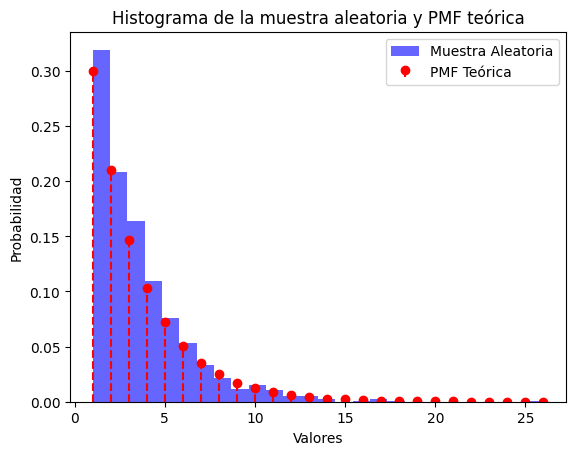

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

def geometrica_inversa(p, size):
    u = np.random.rand(size) 
    X = np.ceil(np.log(1 - u) / np.log(1 - p))  
    return X.astype(int) 

p = 0.3
size = 1000

sample = geometrica_inversa(p, size)

k_values = np.arange(1, np.max(sample) + 1)
pmf_teorica = geom.pmf(k_values, p)

plt.hist(sample, bins=np.max(sample), density=True, alpha=0.6, color='blue', label='Muestra Aleatoria')
plt.stem(k_values, pmf_teorica, linefmt='r--', markerfmt='ro', basefmt=' ', label='PMF Teórica')

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Histograma de la muestra aleatoria y PMF teórica')
plt.legend()
plt.show()


### Tasks 2
Genere muestras aleatorias a partir de una distribución de Poisson utilizando el método de rechazo.
1. Defina una distribución de Poisson objetivo con el parámetro λ = 3.
2. Elija una distribución de propuesta que sea fácil de muestrear, como una distribución uniforme o
exponencial.
3. Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto.
4. Implemente el método de rechazo para generar muestras aleatorias a partir de la distribución de Poisson.
5. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución de Poisson.
6. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.

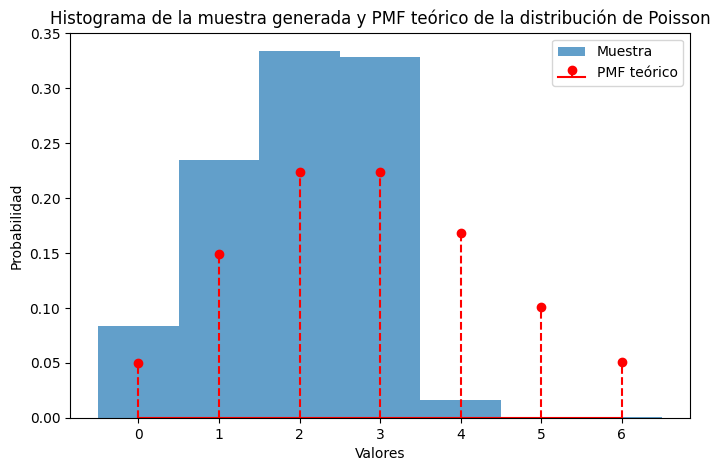

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, expon

lambda_poisson = 3
poisson_dist = poisson(lambda_poisson)

lambda_exponential = lambda_poisson
exponential_dist = expon(scale=1/lambda_exponential)

C = poisson_dist.pmf(lambda_poisson) / exponential_dist.pdf(lambda_poisson)

def generar_muestra_poisson(n):
    muestra = []
    while len(muestra) < n:
        x = np.floor(exponential_dist.rvs())
        u = np.random.uniform(0, 1)
        if u < poisson_dist.pmf(x) / (C * exponential_dist.pdf(x)):
            muestra.append(x)
    return np.array(muestra)

tamano_muestra = 1000
muestra_poisson = generar_muestra_poisson(tamano_muestra)

valores_posibles = np.arange(0, np.max(muestra_poisson) + 1)
pmf_teorico = poisson_dist.pmf(valores_posibles)

plt.figure(figsize=(8, 5))
plt.hist(muestra_poisson, bins=np.arange(-0.5, np.max(muestra_poisson) + 1.5, 1), density=True, alpha=0.7, label='Muestra')
plt.stem(valores_posibles, pmf_teorico, linefmt='r--', markerfmt='ro', basefmt='r-', label='PMF teórico')
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Histograma de la muestra generada y PMF teórico de la distribución de Poisson')
plt.legend()
plt.show()


Como se puede ver en el grafico anterior los valores generados de un principio si se estan apegando bastante al valor teorico de la distribucion de poisson sin embargo, a medida que se van generando mas valores estos se van alejando del valor teorico, esto se debe a que la muestra aún no ha convergido completamente hacia la distribución objetivo. 

### Tasks 3
Genere muestras aleatorias a partir de una distribución de probabilidad discreta personalizada mediante el método
de aceptación-rechazo.
1. Defina una distribución de probabilidad discreta objetivo con valores y probabilidades especificados.
a. Función = (x**2) / 55
2. Elija una distribución de propuesta con un soporte mayor que cubra el soporte de la distribución de destino.
a. N.B: El "soporte" de una variable aleatoria o distribución de probabilidad se refiere al conjunto de
valores para los cuales la variable aleatoria tiene una probabilidad distinta de cero. En otras
palabras, es el rango de valores donde la distribución de probabilidad es positiva.
3. Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto.
4. Implemente el método de aceptación-rechazo para generar muestras aleatorias a partir de la distribución
discreta personalizada.
5. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución personalizada.
6. Trace un histograma de la muestra generada y compárelo con el PMF objetivo.


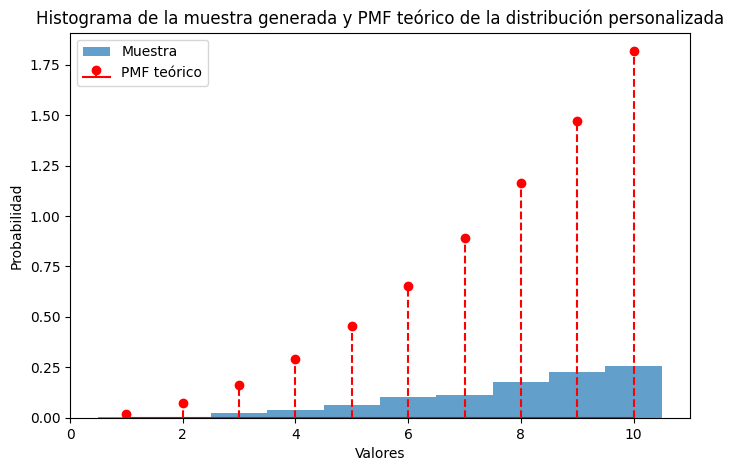

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def pmf_objetivo(x):
    return (x**2) / 55

N = 10 
distribucion_propuesta = np.arange(1, N+1) 

C = max(pmf_objetivo(distribucion_propuesta) / (1/N))

def generar_muestra_personalizada(n):
    muestra = []
    while len(muestra) < n:
        x = np.random.choice(distribucion_propuesta) 
        u = np.random.uniform(0, 1)
        if u < pmf_objetivo(x) / (C * (1/N)):
            muestra.append(x)
    return np.array(muestra)

tamano_muestra = 1000
muestra_personalizada = generar_muestra_personalizada(tamano_muestra)

valores_posibles = np.arange(1, N+1)
pmf_teorico = pmf_objetivo(valores_posibles)

plt.figure(figsize=(8, 5))
plt.hist(muestra_personalizada, bins=np.arange(0.5, N+1.5, 1), density=True, alpha=0.7, label='Muestra')
plt.stem(valores_posibles, pmf_teorico, linefmt='r--', markerfmt='ro', basefmt='r-', label='PMF teórico')
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Histograma de la muestra generada y PMF teórico de la distribución personalizada')
plt.legend()
plt.show()


Como se puede observar en la gráfica anterior, los datos parecen presentar el comportamiento deseado pero a una menor escala. A pesar de esto el crecimiento no es lo suficientemente rápido como para ajustarse a la tendencia de la distribución personalizda. 